# The Attention Mechanism
Copyright 2021, Denis Rothman, MIT License. Denis Rothman rewrote the reference notebook entirely in basic Python with no frameworks. Three more steps were added, and a Hugging Face transformer example was added. The original images were taken out, redesigned by Denis Rothman for educational purposes, and inserted in the book descriptions of the multi-attention sub-layer.

The goal of this notebook is to obtain a mathematical view of the attention mechanism of transformer models. An industry 4.0 developer will become and AI expert with in-depth NLP knowledge. 

[The Reference Colaboratory Notebook was written by Manuel Romero](https://colab.research.google.com/drive/1rPk3ohrmVclqhH7uQ7qys4oznDdAhpzF)

[A Medium article was written by Raimi Karim](https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a)

#Step 1: Represent the input

In [1]:
from IPython.display import Image     #This is used for rendering images in the notebook

In [ ]:
import numpy as np
from scipy.special import softmax

In [ ]:
print("Step 1: Input : 3 inputs, d_model=4")
x =np.array([[1.0, 0.0, 1.0, 0.0],   # Input 1
             [0.0, 2.0, 0.0, 2.0],   # Input 2
             [1.0, 1.0, 1.0, 1.0]])  # Input 3
print(x)

Step 1: Input : 3 inputs, d_model=4
[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


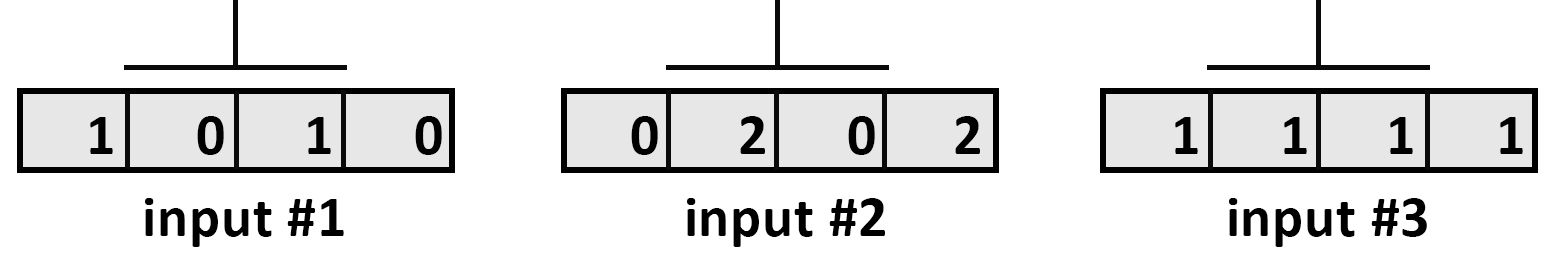

In [3]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_11.png', width=600) #This is used for rendering images in the notebook

#Step 2: Initializing the weight matrices

In [ ]:
print("Step 2: weights 3 dimensions x d_model=4")
print("w_query")
w_query =np.array([[1, 0, 1],
                   [1, 0, 0],
                   [0, 0, 1],
                   [0, 1, 1]])
print(w_query)

Step 2: weights 3 dimensions x d_model=4
w_query
[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]


In [ ]:
print("w_key")
w_key =np.array([[0, 0, 1],
                 [1, 1, 0],
                 [0, 1, 0],
                 [1, 1, 0]])
print(w_key)

w_key
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]


In [ ]:
print("w_value")
w_value = np.array([[0, 2, 0],
                    [0, 3, 0],
                    [1, 0, 3],
                    [1, 1, 0]])
print(w_value)

w_value
[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


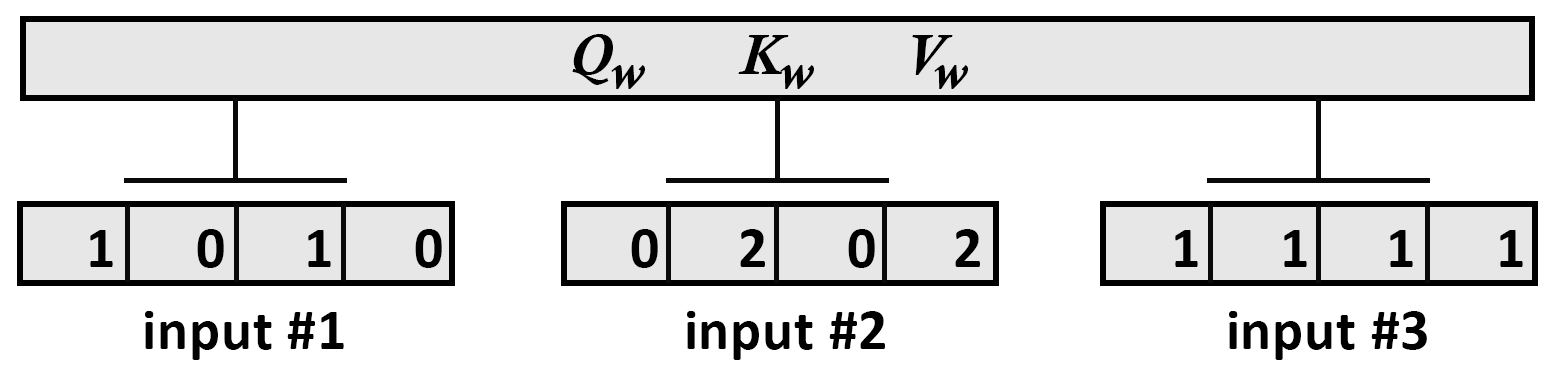

In [4]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_12.png', width=600) #This is used for rendering images in the notebook

#Step 3: Matrix multiplication to obtain Q, K, and V

In [ ]:
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Queries: x * w_query")
Q=np.matmul(x,w_query)
print(Q)

Step 3: Matrix multiplication to obtain Q,K,V
Queries: x * w_query
[[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]


In [ ]:
print("Step 3: Matrix multiplication to obtain Q,K,V")

print("Keys: x * w_key")
K=np.matmul(x,w_key)
print(K)

Step 3: Matrix multiplication to obtain Q,K,V
Keys: x * w_key
[[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]


In [ ]:
print("Values: x * w_value")
V=np.matmul(x,w_value)
print(V)

Values: x * w_value
[[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


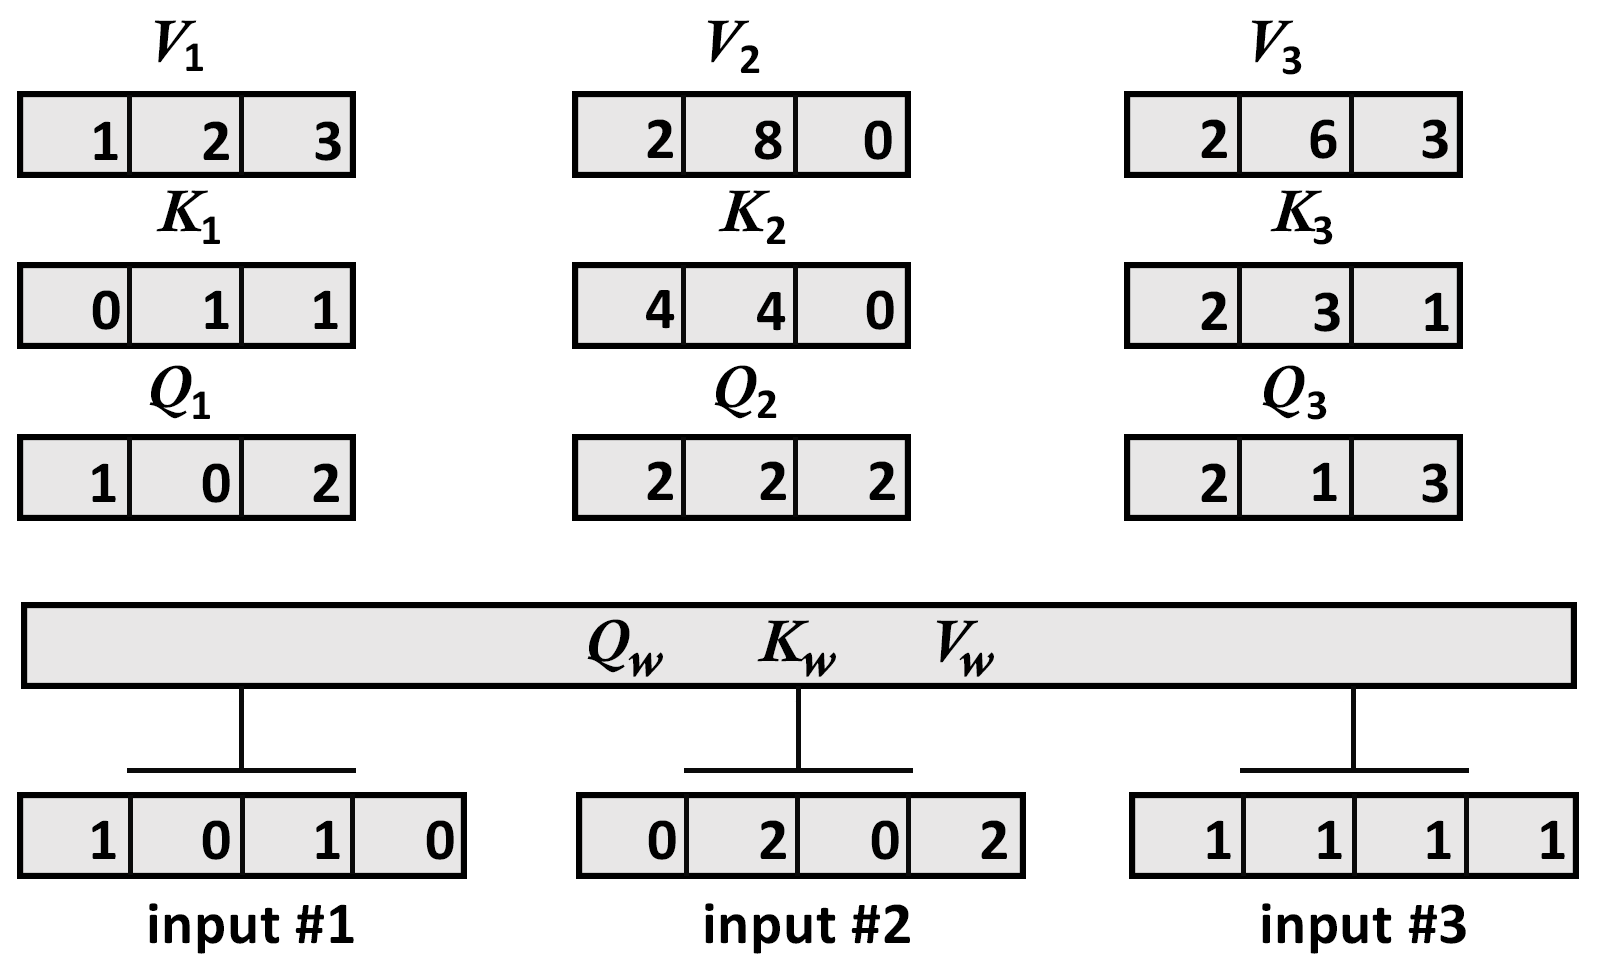

In [8]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_13.png', width=600) #This is used for rendering images in the notebook

#Step 4: Scaled attention scores

In [ ]:
print("Step 4: Scaled Attention Scores")
k_d=1   #square root of k_d simplified to 1 for this example
attention_scores = (Q @ K.transpose())/k_d
print(attention_scores)

Step 4: Scaled Attention Scores
[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


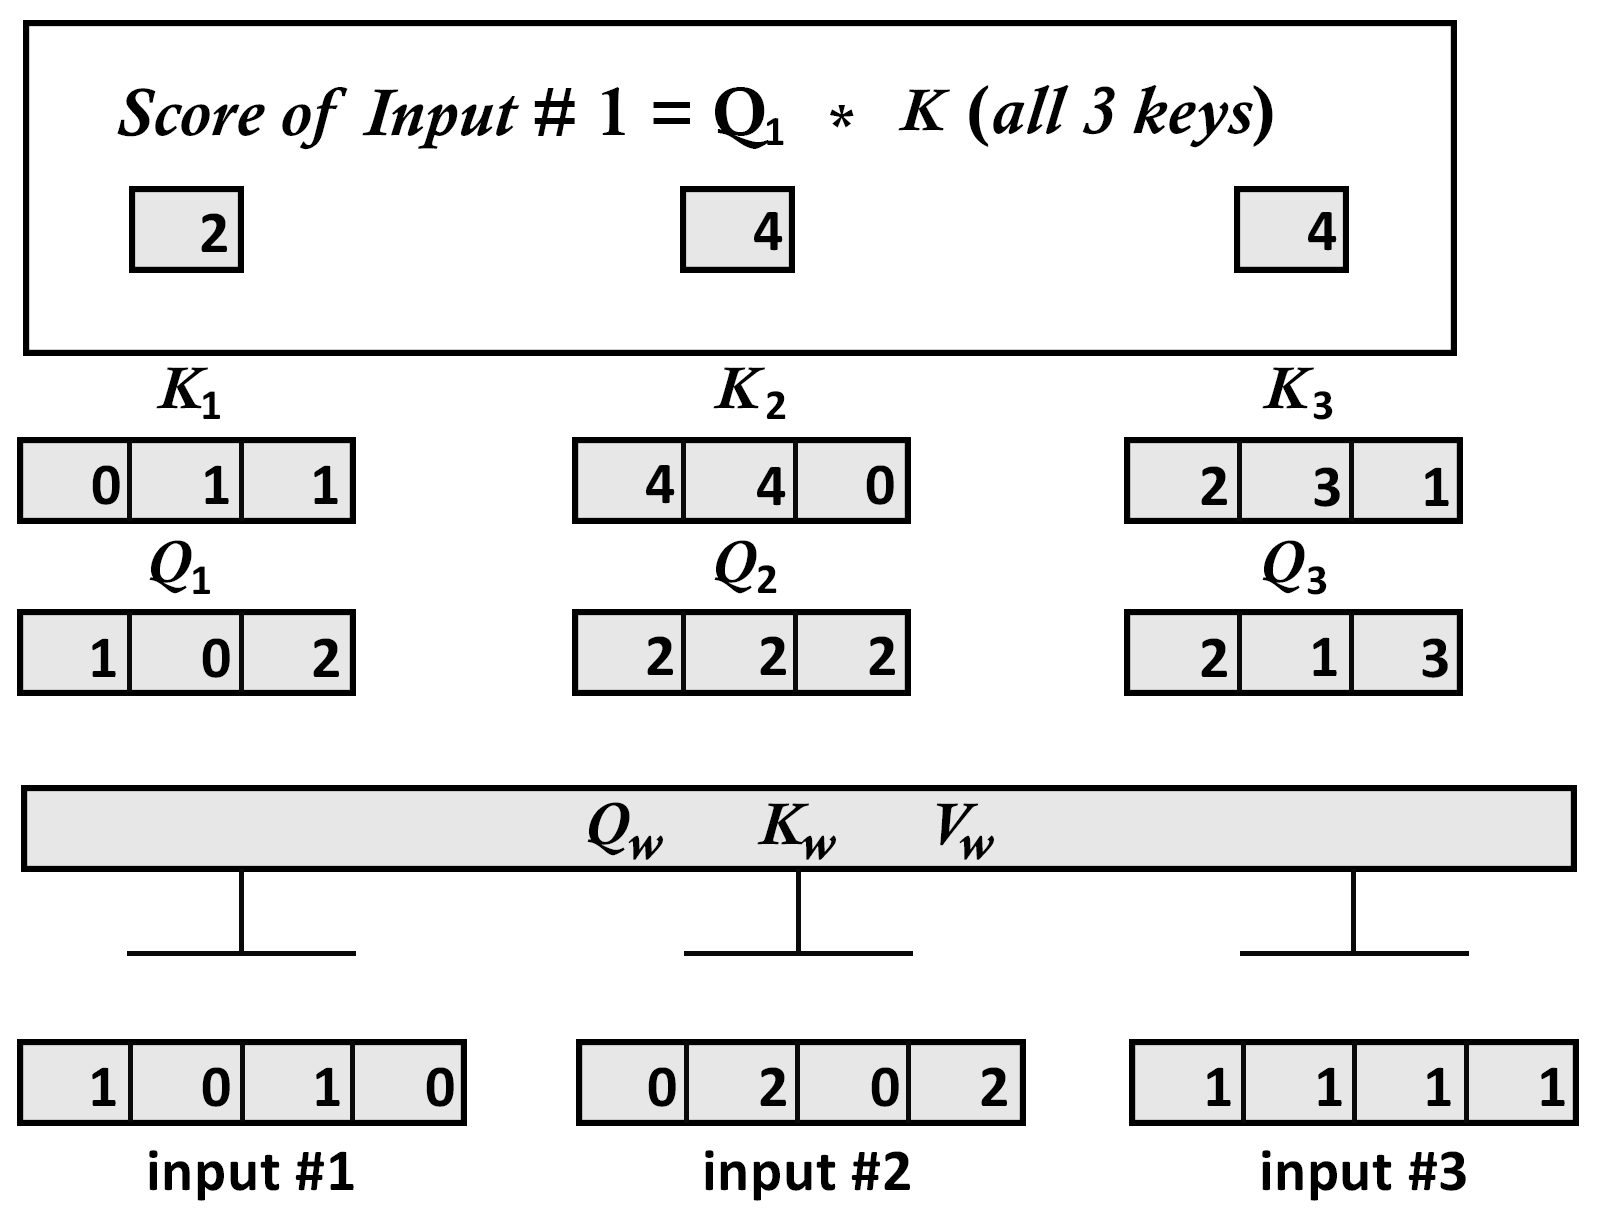

In [9]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_14.png', width=600) #This is used for rendering images in the notebook

#Step 5: Scaled softmax attention scores for each vector

In [ ]:
print("Step 5: Scaled softmax attention_scores for each vector")
attention_scores[0]=softmax(attention_scores[0])
attention_scores[1]=softmax(attention_scores[1])
attention_scores[2]=softmax(attention_scores[2])
print(attention_scores[0])
print(attention_scores[1])
print(attention_scores[2])

Step 5: Scaled softmax attention_scores for each vector
[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


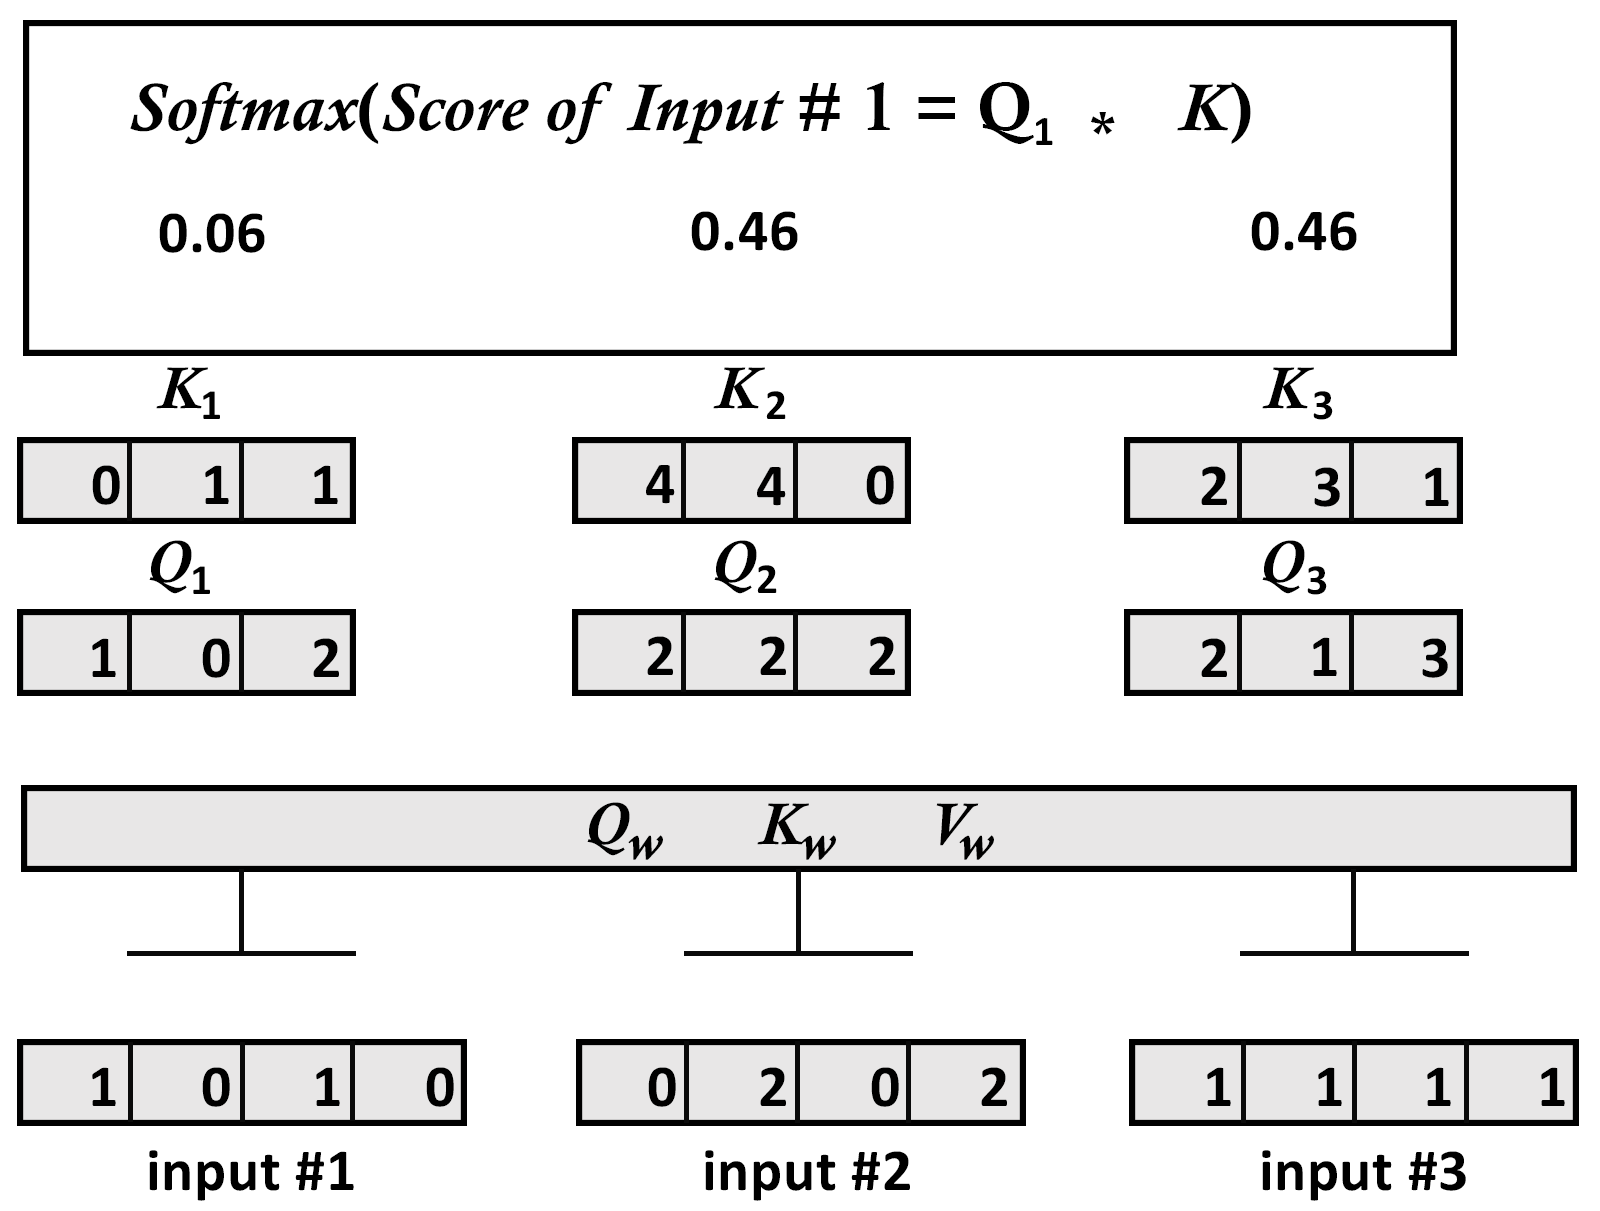

In [10]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_15.png', width=600) #This is used for rendering images in the notebook

#Step 6: The final attention representations

In [ ]:
print("Step 6: attention value obtained by score1/k_d * V")
print(V[0])
print(V[1])
print(V[2])
print("Attention 1")
attention1=attention_scores[0].reshape(-1,1)
attention1=attention_scores[0][0]*V[0]
print(attention1)

print("Attention 2")
attention2=attention_scores[0][1]*V[1]
print(attention2)

print("Attention 3")
attention3=attention_scores[0][2]*V[2]
print(attention3)

Step 6: attention value obtained by score1/k_d * V
[1. 2. 3.]
[2. 8. 0.]
[2. 6. 3.]
Attention 1
[0.06337894 0.12675788 0.19013681]
Attention 2
[0.93662106 3.74648425 0.        ]
Attention 3
[0.93662106 2.80986319 1.40493159]


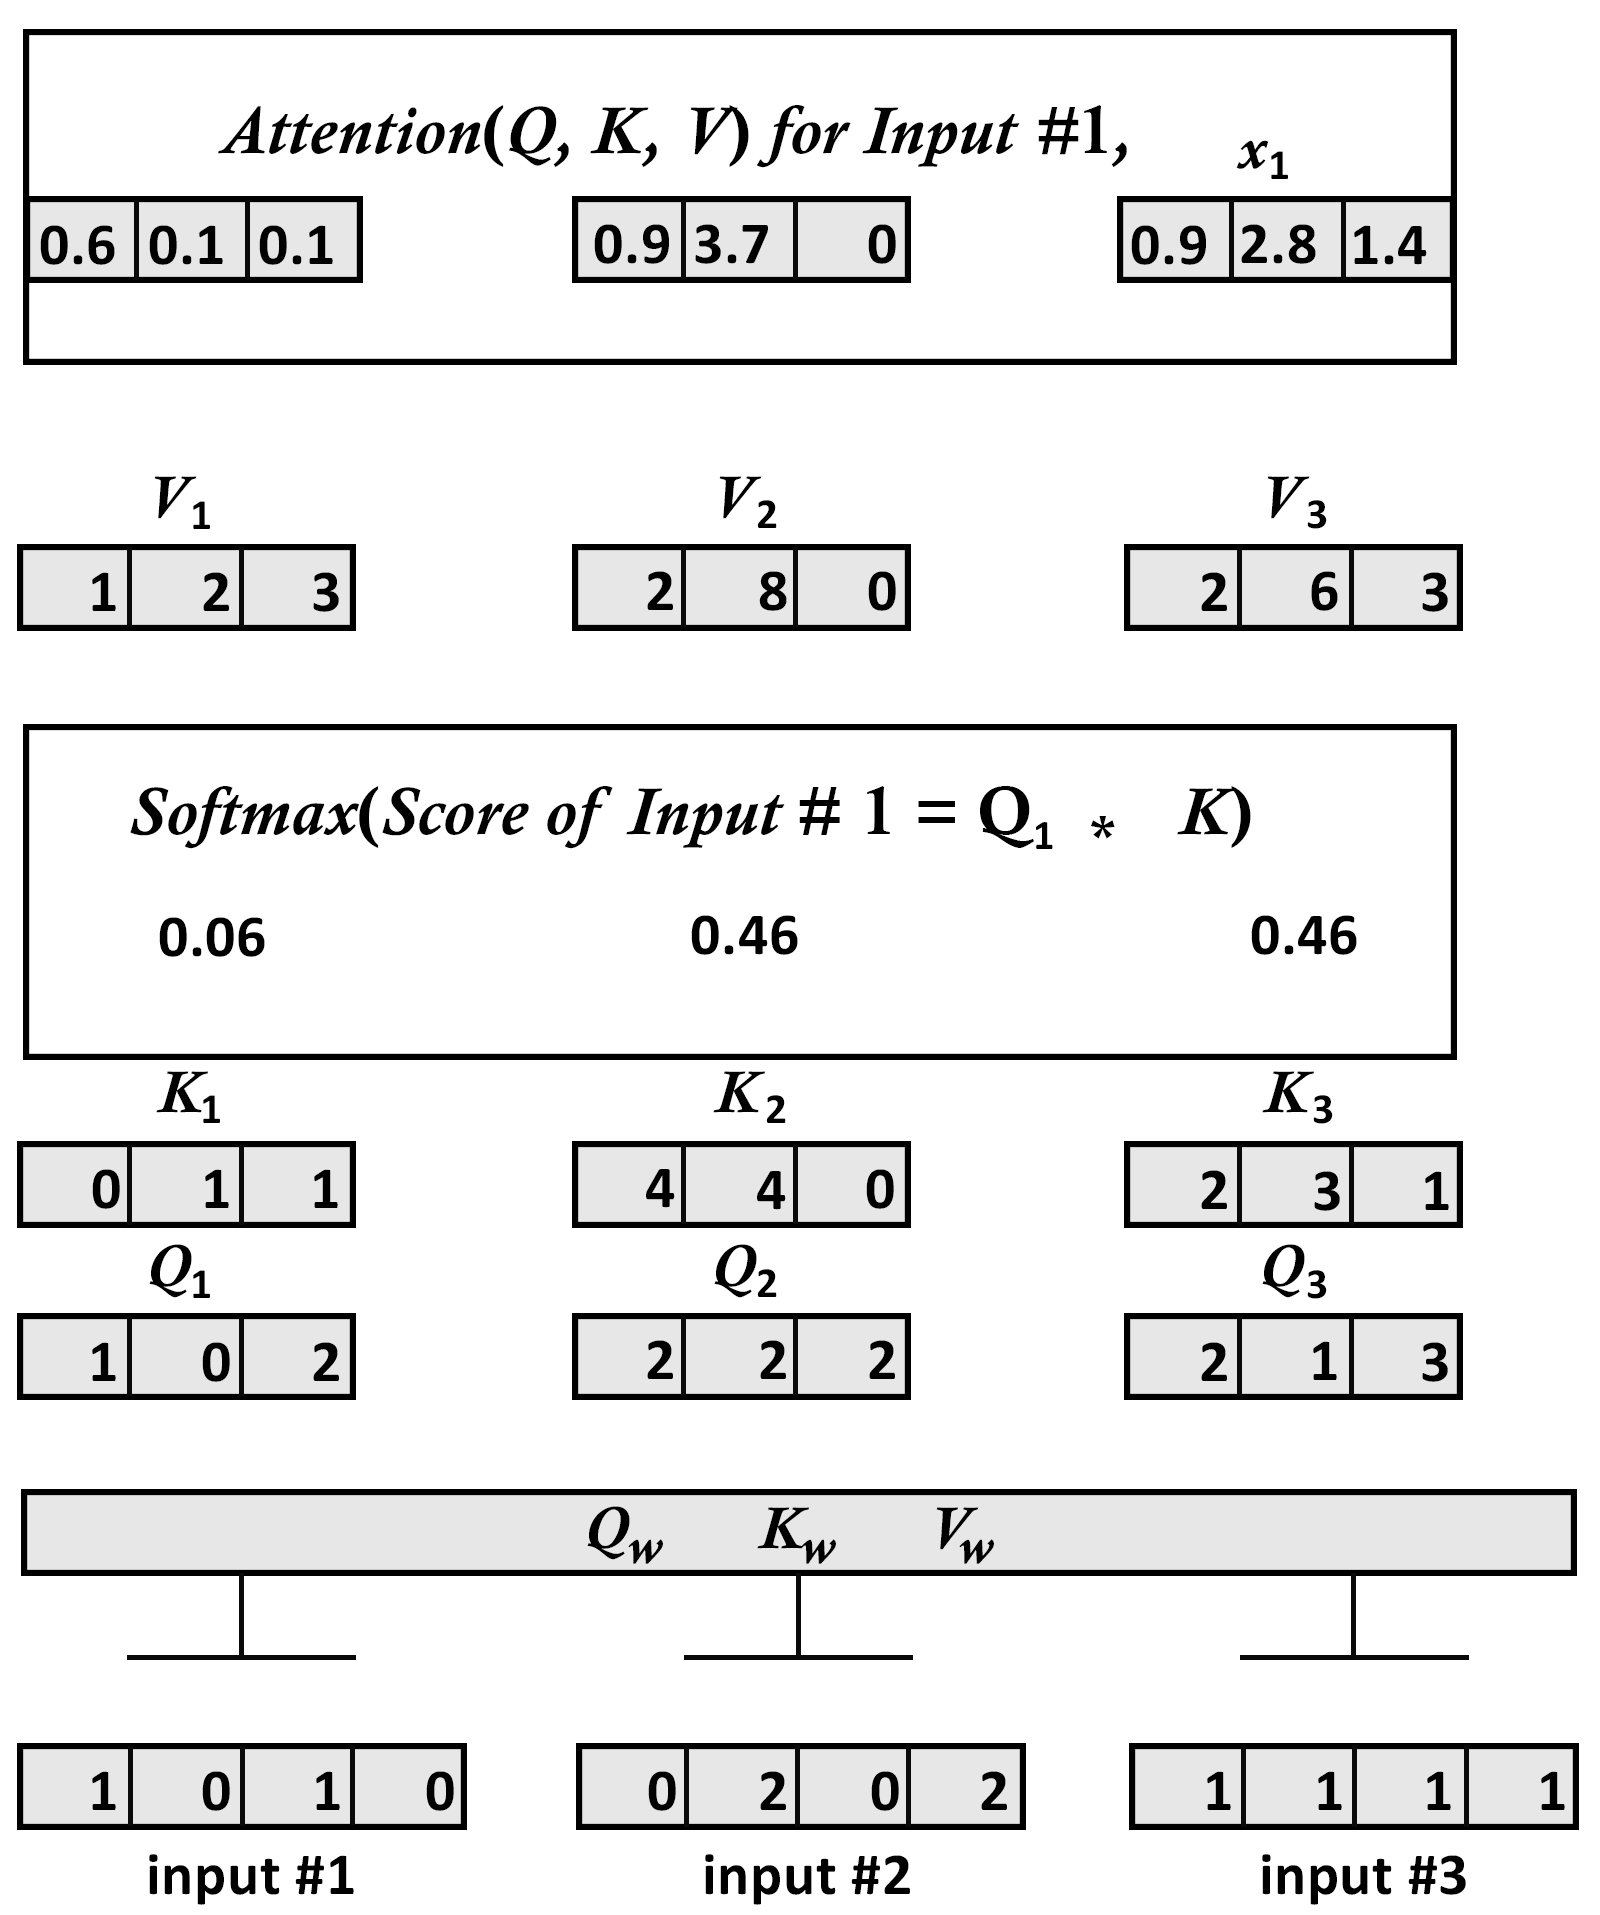

In [11]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_16.png', width=600) #This is used for rendering images in the notebook

#Step 7: Summing up the results

In [ ]:
print("Step 7: summed the results to create the first line of the output matrix")
attention_input1=attention1+attention2+attention3
print(attention_input1)

Step 7: summed the results to create the first line of the output matrix
[1.93662106 6.68310531 1.59506841]


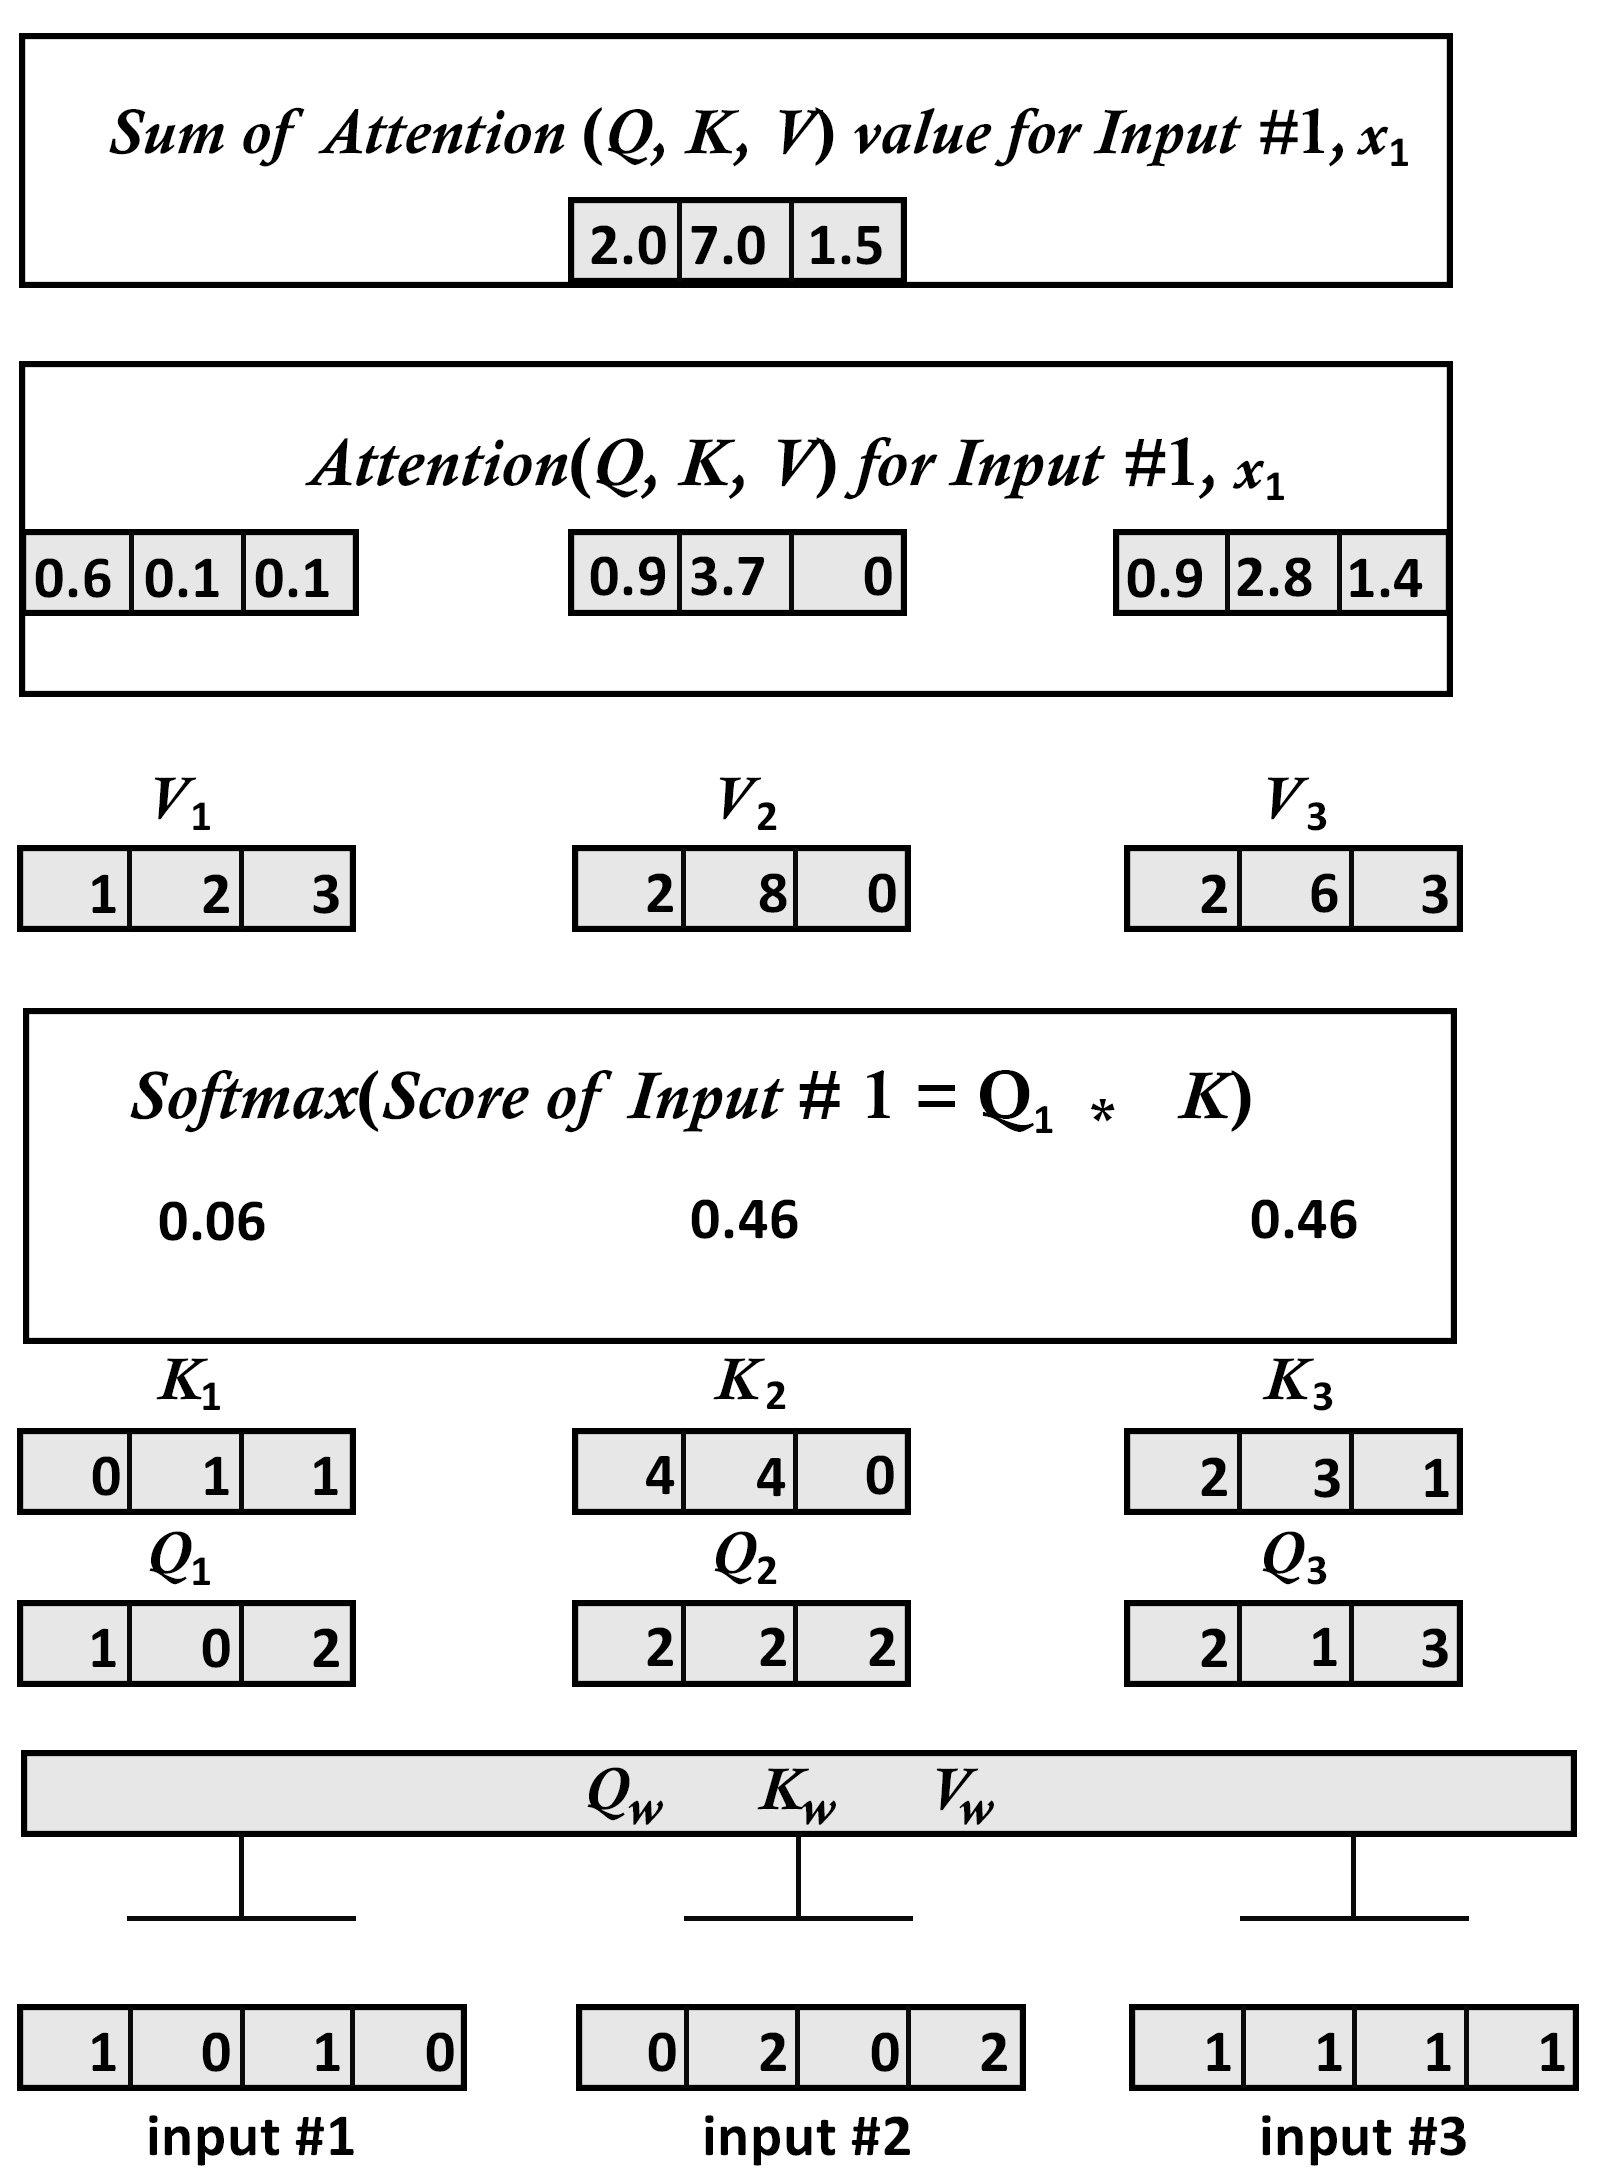

In [12]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_17.png', width=600) #This is used for rendering images in the notebook

#Step 8: Steps 1 to 7 for all the inputs

In [ ]:
print("Step 8: Step 1 to 7 for inputs 1 to 3")
#We assume we have 3 results with learned weights (they were not trained in this example)
#We assume we are implementing the original Transformer paper. We will have 3 results of 64 dimensions each
attention_head1=np.random.random((3, 64))
print(attention_head1)

Step 8: Step 1 to 7 for inputs 1 to 3
[[0.20216353 0.43707436 0.07130255 0.10509762 0.63655638 0.91845543
  0.06511085 0.07839665 0.51316846 0.54571701 0.3358703  0.52092181
  0.79275993 0.16141936 0.44289286 0.24053967 0.3109181  0.54028169
  0.06520682 0.32269673 0.13930313 0.69075813 0.75375274 0.44131116
  0.56119458 0.71839979 0.0468888  0.25340444 0.1991619  0.16644107
  0.92459036 0.59387568 0.63877313 0.53316123 0.83347252 0.11372678
  0.72663227 0.69516306 0.44438683 0.56273503 0.31350469 0.02059847
  0.82681567 0.16856187 0.04148594 0.33847877 0.47074381 0.61881375
  0.46843675 0.26956432 0.61479742 0.12607179 0.13802037 0.92223123
  0.6391338  0.65150402 0.07907932 0.91520524 0.30195508 0.48254499
  0.39480221 0.12666071 0.46255227 0.36424959]
 [0.0903881  0.29480922 0.85009611 0.17853338 0.34601251 0.93763393
  0.540043   0.7225249  0.63869781 0.52115495 0.66330458 0.23289114
  0.01969132 0.01413506 0.14770146 0.245892   0.99449404 0.79260813
  0.83122168 0.61600548 0.58212

#Step 9: The output of the heads of the attention sublayer

In [ ]:
print("Step 9: We assume we have trained the 8 heads of the attention sub-layer")
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))
print("shape of one head",z0h1.shape,"dimension of 8 heads",64*8)

Step 9: We assume we have trained the 8 heads of the attention sub-layer
shape of one head (3, 64) dimension of 8 heads 512


#Step 10: Concatenation of the output of the heads

In [ ]:
print("Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model")
output_attention=np.hstack((z0h1,z1h2,z2h3,z3h4,z4h5,z5h6,z6h7,z7h8))
print(output_attention)

Step 10: Concatenation of heads 1 to 8 to obtain the original 8x64=512 output dimension of the model
[[0.56468036 0.84093457 0.82947301 ... 0.38060399 0.40217666 0.41135804]
 [0.39462287 0.7404385  0.19385572 ... 0.35313777 0.09411459 0.34114942]
 [0.25418635 0.6578489  0.75116683 ... 0.88148612 0.91526444 0.80329105]]


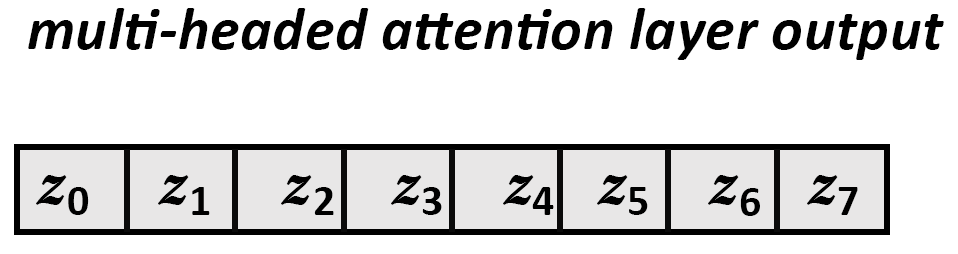

In [15]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_18.png', width=600) #This is used for rendering images in the notebook

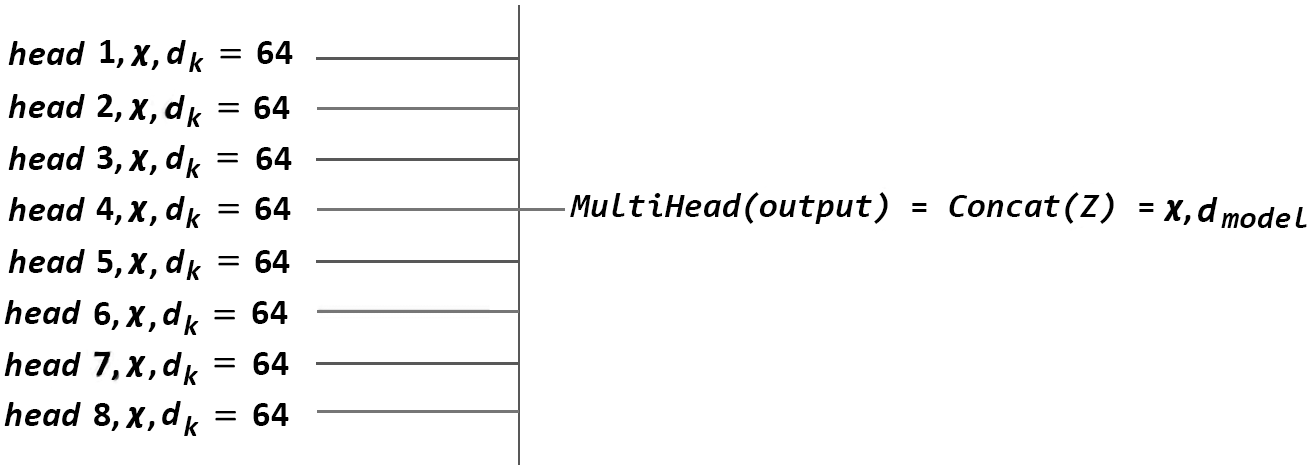

In [16]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/02/B17948_02_19.png', width=600) #This is used for rendering images in the notebook

And now with Hugging Face in one line!

In [ ]:
#@title Transformer Installation
!pip -q install transformers

In [ ]:
#@title Retrieve pipeline of modules and choose English to French translation
from transformers import pipeline
translator = pipeline("translation_en_to_fr")
#One line of code!
print(translator("It is easy to translate languages with transformers", max_length=40))

No model was supplied, defaulted to t5-base (https://huggingface.co/t5-base)


[{'translation_text': "Il est facile de traduire des langues à l'aide de transformateurs"}]
